In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
# 读取train.csv
data = pd.read_csv('../results/train_data.csv') 
# data = pd.read_csv('../datasets/train.csv') 
X_train = data.iloc[:, :-1]  
y_train = data.iloc[:, -1]   

# 读取test.csv
test = pd.read_csv('../results/test_data.csv') 
X_test = test.iloc[:, :-1]  
X_test.fillna(X_test.median(), inplace=True)
y_test = test.iloc[:, -1]  

C:\Users\dhtfj\AppData\Local\Temp\ipykernel_110832\1671153067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.median(), inplace=True)


In [3]:
# 添加常数项
X_train = sm.add_constant(X_train)  
X_test = sm.add_constant(X_test)

In [4]:
# 创建并拟合线性回归模型
model = sm.OLS(y_train, X_train).fit()

In [5]:
# 打印模型摘要
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Fireplaces   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     45.01
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           7.84e-82
Time:                        23:37:37   Log-Likelihood:                -930.75
No. Observations:                1167   AIC:                             1885.
Df Residuals:                    1155   BIC:                             1946.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.1371      2.160      4.230   

In [6]:
# 使用模型进行预测
y_pred = model.predict(X_test)

In [7]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.4548908124318699
mean_squared_error: 0.29056353151811654
rmse: 0.5390394526545497
r2 score: 0.3201819567170462


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class LinearRegression:
    def __init__(self, include_bias=True, regularization=False):
        self.include_bias = include_bias
        self.regularization = regularization
        self.theta = None
        self.cost_history = []

    def _prepare_data(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X] if self.include_bias else X

    def fit(self, X, y, method='normal', **kwargs):
        X = self._prepare_data(X)
        y = np.array(y).reshape(-1, 1)
        self.theta = np.zeros((X.shape[1], 1))

        if method == 'normal':
            self._fit_normal_equation(X, y, **kwargs)
        elif method == 'gradient':
            self._fit_gradient_descent(X, y, **kwargs)
        else:
            raise ValueError("Method must be either 'normal' or 'gradient'")

        return self.theta

    def _fit_normal_equation(self, X, y,lambda_=0):
        m, n = X.shape
        if self.regularization:
            # 添加正则化项（岭回归）
            L = lambda_ * np.eye(n)  # 正则化项
            L[0, 0] = 0  # 不对偏置项进行正则化
            self.theta = np.linalg.solve(X.T.dot(X) + L, X.T.dot(y))
        else:
            # 不使用正则化的正规方程
            self.theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))

        cost = self._compute_cost(X, y)
        self.cost_history.append(cost)
        print(f"Cost after normal equation: {cost}")

    def _fit_gradient_descent(self, X, y, alpha=0.01, num_iterations=500, lambda_=0):
        m = X.shape[0]
        X_T = X.T

        for _ in range(num_iterations):
            predictions = X.dot(self.theta)
            error = predictions - y
            
            gradient = (1/m) * X_T.dot(error)
            if self.regularization:
                reg_term = (lambda_ / m) * self.theta
                if self.include_bias:
                    reg_term[0] = 0  # 不对偏置项进行正则化
                gradient += reg_term
            
            self.theta -= alpha * gradient
            
            cost = self._compute_cost(X, y)
            self.cost_history.append(cost)

    def _compute_cost(self, X, y):
        m = X.shape[0]
        predictions = X.dot(self.theta)
        error = predictions - y
        cost = (1 / (2 * m)) * np.sum(np.square(error))
        return cost

    def predict(self, X):
        X = self._prepare_data(X)
        return X.dot(self.theta)

    def plot_final_cost_history(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.cost_history) + 1), self.cost_history)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost Function History')
        plt.grid(True)
        plt.show()

In [9]:
# 创建 LinearRegression 模型
model = LinearRegression(include_bias=True, regularization=True)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [10]:
# 训练模型，使用梯度下降法
model.fit(X_train_scaled, y_train, method='gradient', alpha=0.01, num_iterations=1000, lambda_=0.1)


array([[ 0.61179878],
       [ 0.        ],
       [ 0.18033321],
       [ 0.09315976],
       [ 0.18163798],
       [ 0.08527275],
       [-0.10874679],
       [-0.0506289 ],
       [ 0.12177174],
       [-0.06981728],
       [-0.054844  ],
       [-0.00231885],
       [-0.09621328]])

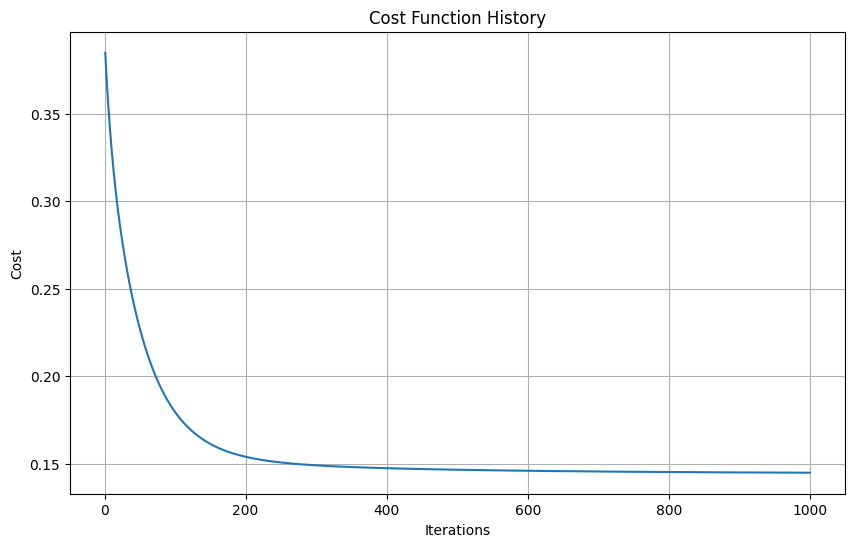

In [11]:
model.plot_final_cost_history()

In [12]:
X_test_scaled = scaler.fit_transform(X_test)
y_pred=model.predict(X_test_scaled)

In [13]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.45571389577408045
mean_squared_error: 0.28778634869460534
rmse: 0.5364572198177645
r2 score: 0.32667960280172237


In [14]:
# 训练模型，使用最小二乘法
model.fit(X_train_scaled, y_train, method='normal',lambda_=0.1)

Cost after normal equation: 0.14429267467020415


array([[ 0.61182519],
       [ 0.        ],
       [ 0.19515026],
       [ 0.0820264 ],
       [ 0.21375486],
       [ 0.13721721],
       [-0.16359254],
       [-0.07167673],
       [ 0.13944171],
       [-0.07769775],
       [-0.08731818],
       [ 0.00208453],
       [-0.100777  ]])

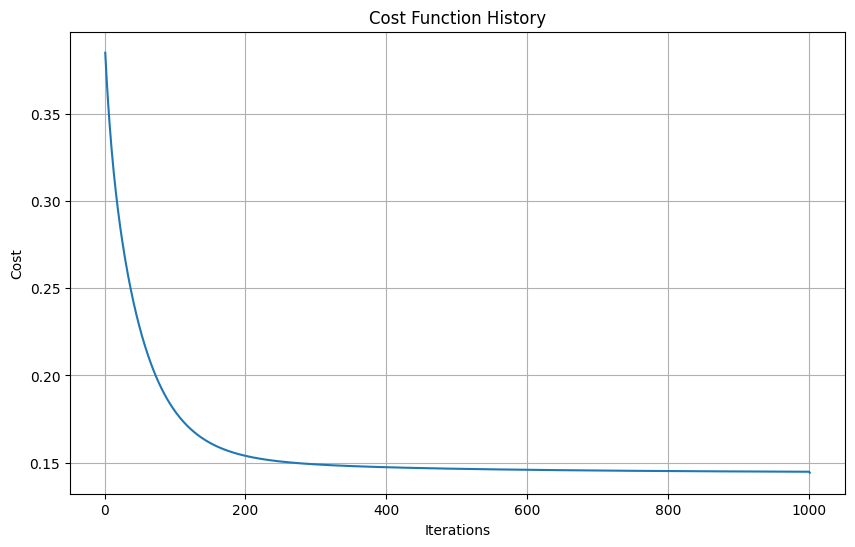

In [15]:
model.plot_final_cost_history()

In [16]:
X_test_scaled = scaler.fit_transform(X_test)
y_pred=model.predict(X_test_scaled)

In [17]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.45764695061247473
mean_squared_error: 0.29212474941671296
rmse: 0.5404856606948171
r2 score: 0.31652924747505373


## 实验1：是否添加偏置项

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# 评估指标
r2_scores = []
mean_absolute_errors = []
mean_squared_errors = []
rmses = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
y_pred=model.predict(X_test_scaled)

# 训练模型，设置无偏置项
model_no_bias = LinearRegression(include_bias=False, regularization=True)
model_no_bias.fit(X_train_scaled, y_train, method='gradient', alpha=0.01, num_iterations=1000, lambda_=0.1)
y_pred_no_bias = model_no_bias.predict(X_test_scaled)

# 计算评估指标
r2_scores.append(abs(r2_score(y_test, y_pred_no_bias)))
mean_absolute_errors.append(mean_absolute_error(y_test, y_pred_no_bias))
mean_squared_errors.append(mean_squared_error(y_test, y_pred_no_bias))
rmses.append(np.sqrt(mean_squared_error(y_test, y_pred_no_bias)))

# 训练模型，设置有偏置项
model_with_bias = LinearRegression(include_bias=True, regularization=True)
model_with_bias.fit(X_train_scaled, y_train, method='gradient', alpha=0.01, num_iterations=1000, lambda_=0.1)
y_pred_with_bias = model_with_bias.predict(X_test_scaled)

# 计算评估指标
r2_scores.append(abs(r2_score(y_test, y_pred_with_bias)))
mean_absolute_errors.append(mean_absolute_error(y_test, y_pred_with_bias))
mean_squared_errors.append(mean_squared_error(y_test, y_pred_with_bias))
rmses.append(np.sqrt(mean_squared_error(y_test, y_pred_with_bias)))

# 创建并拟合线性回归模型
sm_model = sm.OLS(y_train, X_train_scaled).fit()
y_pred_sm = model.predict(X_test_scaled)
r2_scores.append(abs(r2_score(y_test, y_pred_sm)))
mean_absolute_errors.append(mean_absolute_error(y_test, y_pred_sm))
mean_squared_errors.append(mean_squared_error(y_test, y_pred_sm))
rmses.append(np.sqrt(mean_squared_error(y_test, y_pred_sm)))

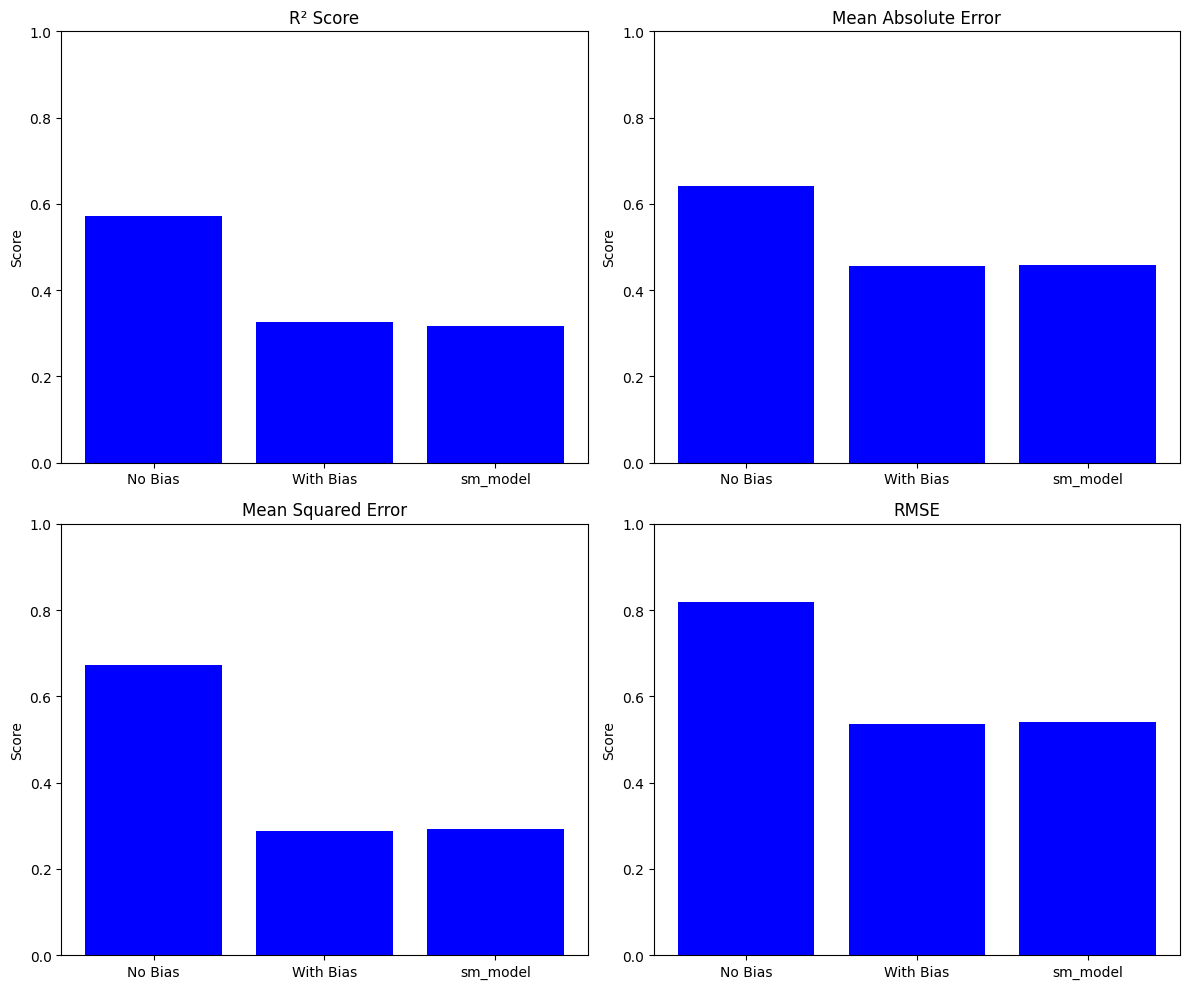

In [19]:
# 定义评估指标及对应的标题和颜色
metrics = [r2_scores, mean_absolute_errors, mean_squared_errors, rmses]
metric_titles = ['R² Score', 'Mean Absolute Error', 'Mean Squared Error', 'RMSE']
colors = 'blue'

# 创建四个子图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 绘制每个指标的条形图
for i, (metric, title) in enumerate(zip(metrics, metric_titles)):
    ax = axs[i // 2, i % 2]
    ax.bar(['No Bias', 'With Bias','sm_model'], [metric[0], metric[1],metric[2]], color=colors)
    ax.set_title(title)
    ax.set_ylabel('Score')
    ax.set_ylim(0, max(max(metric) * 1.1, 1))  # 根据最大值设置 y 轴范围

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [20]:
# 打印预测结果和评估指标
print("No Bias Predictions:", y_pred_no_bias)
print("No Bias R² Score:", r2_score(y_test, y_pred_no_bias))
print("No Bias Mean Absolute Error:", mean_absolute_error(y_test, y_pred_no_bias))
print("No Bias Mean Squared Error:", mean_squared_error(y_test, y_pred_no_bias))
print("No Bias RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_no_bias)))

No Bias Predictions: [[-0.16091697]
 [ 0.20696237]
 [ 1.59282974]
 [-0.09377961]
 [ 0.11810051]
 [-0.32790374]
 [ 0.14572616]
 [ 0.47390085]
 [ 0.74652943]
 [-0.32558766]
 [-0.25688262]
 [ 0.00389625]
 [-0.01664395]
 [ 0.30622776]
 [ 0.60398472]
 [ 2.23148187]
 [-0.1726906 ]
 [ 0.10353146]
 [-0.21232504]
 [-0.34027282]
 [ 0.33515182]
 [-0.0920572 ]
 [ 0.01668635]
 [-0.12696519]
 [-0.07736452]
 [-0.21303292]
 [-0.1639022 ]
 [-0.10244194]
 [-0.28333955]
 [-0.02237478]
 [ 0.19110429]
 [-0.19910989]
 [-0.06469342]
 [-0.37130023]
 [-0.01720228]
 [-0.23973399]
 [ 0.14121791]
 [-0.1678109 ]
 [ 0.55420985]
 [-0.32904267]
 [-0.00476434]
 [-0.08930261]
 [ 0.2797852 ]
 [-0.04543024]
 [-0.01317209]
 [-0.32344438]
 [-0.22082419]
 [-0.19591797]
 [-0.30207977]
 [ 0.00960049]
 [ 0.00490998]
 [-0.21896308]
 [-0.26305066]
 [-0.25965911]
 [-0.08087561]
 [ 0.07590341]
 [ 0.25256531]
 [-0.1720263 ]
 [ 0.04505498]
 [-0.08463416]
 [-0.41971822]
 [ 0.52893959]
 [-0.12741926]
 [ 0.05641802]
 [-0.11212404]
 [-0

In [21]:
print("With Bias Predictions:", y_pred_with_bias)
print("With Bias R² Score:", r2_score(y_test, y_pred_with_bias))
print("With Bias Mean Absolute Error:", mean_absolute_error(y_test, y_pred_with_bias))
print("With Bias Mean Squared Error:", mean_squared_error(y_test, y_pred_with_bias))
print("With Bias RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_with_bias)))

With Bias Predictions: [[ 0.45088181]
 [ 0.81876115]
 [ 2.20462852]
 [ 0.51801917]
 [ 0.72989929]
 [ 0.28389504]
 [ 0.75752494]
 [ 1.08569963]
 [ 1.35832821]
 [ 0.28621112]
 [ 0.35491616]
 [ 0.61569503]
 [ 0.59515483]
 [ 0.91802654]
 [ 1.2157835 ]
 [ 2.84328065]
 [ 0.43910818]
 [ 0.71533024]
 [ 0.39947374]
 [ 0.27152596]
 [ 0.9469506 ]
 [ 0.51974158]
 [ 0.62848513]
 [ 0.48483359]
 [ 0.53443426]
 [ 0.39876586]
 [ 0.44789658]
 [ 0.50935684]
 [ 0.32845923]
 [ 0.589424  ]
 [ 0.80290307]
 [ 0.41268889]
 [ 0.54710536]
 [ 0.24049855]
 [ 0.5945965 ]
 [ 0.37206479]
 [ 0.75301669]
 [ 0.44398788]
 [ 1.16600863]
 [ 0.28275611]
 [ 0.60703444]
 [ 0.52249616]
 [ 0.89158398]
 [ 0.56636854]
 [ 0.59862669]
 [ 0.28835439]
 [ 0.39097459]
 [ 0.41588081]
 [ 0.30971901]
 [ 0.62139927]
 [ 0.61670876]
 [ 0.3928357 ]
 [ 0.34874812]
 [ 0.35213967]
 [ 0.53092317]
 [ 0.68770219]
 [ 0.86436409]
 [ 0.43977248]
 [ 0.65685376]
 [ 0.52716462]
 [ 0.19208056]
 [ 1.14073837]
 [ 0.48437952]
 [ 0.6682168 ]
 [ 0.49967474]
 [

## 实验2：不同的学习率

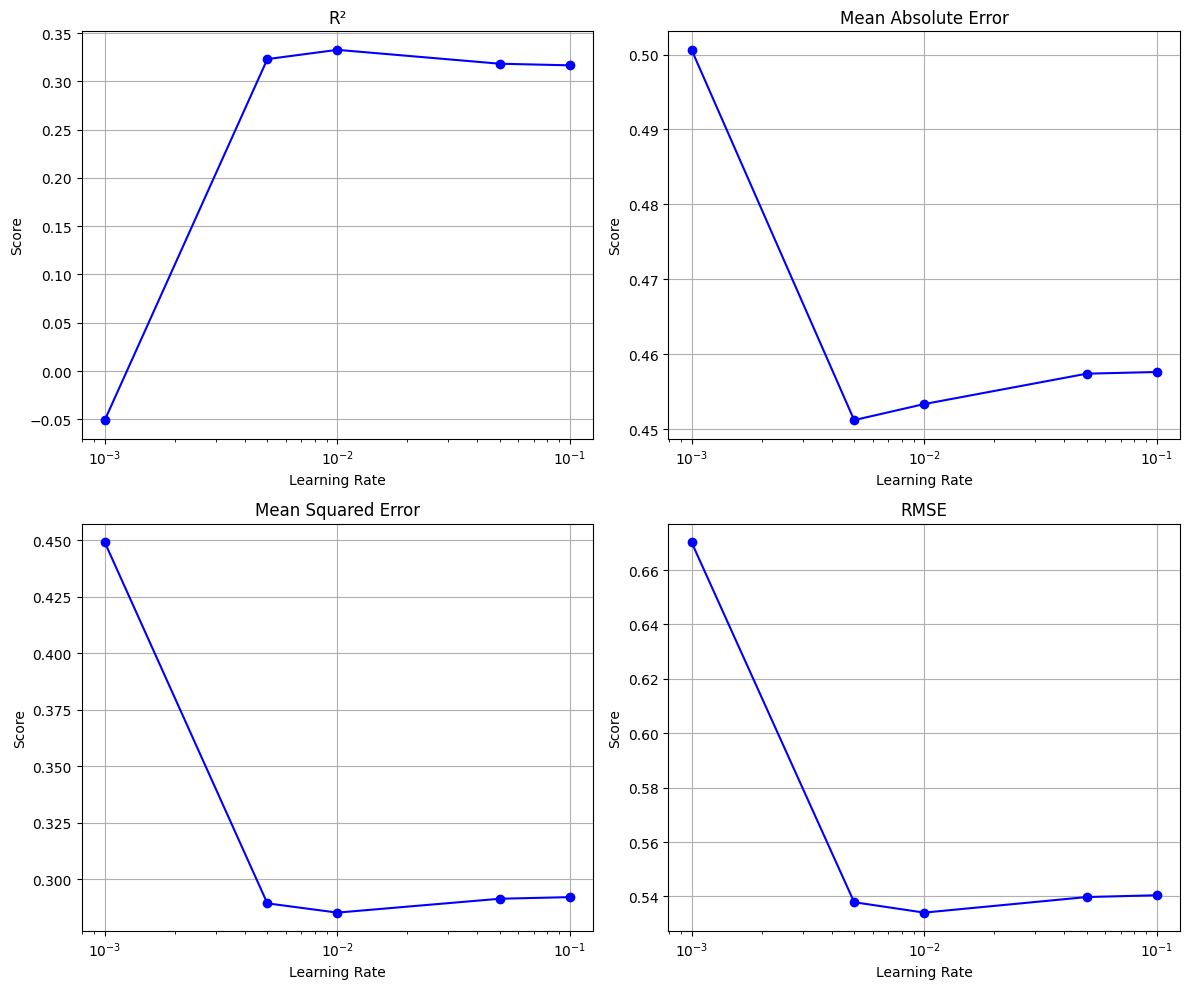

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# 评估指标
r2_scores = []
mean_absolute_errors = []
mean_squared_errors = []
rmses = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
y_pred=model.predict(X_test_scaled)

# 定义不同的学习率
learning_rates = [0.001,0.005, 0.01,0.05, 0.1]
r2_scores = []
mean_absolute_errors = []
mean_squared_errors = []
rmses = []

# 遍历不同的学习率
for lr in learning_rates:
    # 训练模型，设置无偏置项
    model_lr = LinearRegression(include_bias=True, regularization=True)
    model_lr.fit(X_train_scaled, y_train, method='gradient', alpha=lr, num_iterations=500)
    y_pred_lr = model_lr.predict(X_test_scaled)

    # 计算评估指标并保存
    r2_lr = r2_score(y_test, y_pred_lr)  # 取绝对值
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mse_lr)

    r2_scores.append(r2_lr)
    mean_absolute_errors.append(mae_lr)
    mean_squared_errors.append(mse_lr)
    rmses.append(rmse_lr)

# 定义评估指标及对应的标题和颜色
metrics = [r2_scores, mean_absolute_errors, mean_squared_errors, rmses]
metric_titles = ['R²', 'Mean Absolute Error', 'Mean Squared Error', 'RMSE']
colors = 'blue'

# 创建四个子图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 绘制每个指标的条形图
for i, (metric, title) in enumerate(zip(metrics, metric_titles)):
    ax = axs[i // 2, i % 2]
    ax.plot(learning_rates, metric, marker='o', color=colors)  # 使用折线图
    ax.set_title(title)
    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Score')
    ax.set_xscale('log')  # 采用对数坐标
    ax.grid(True)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


## 实验3：不同的迭代次数

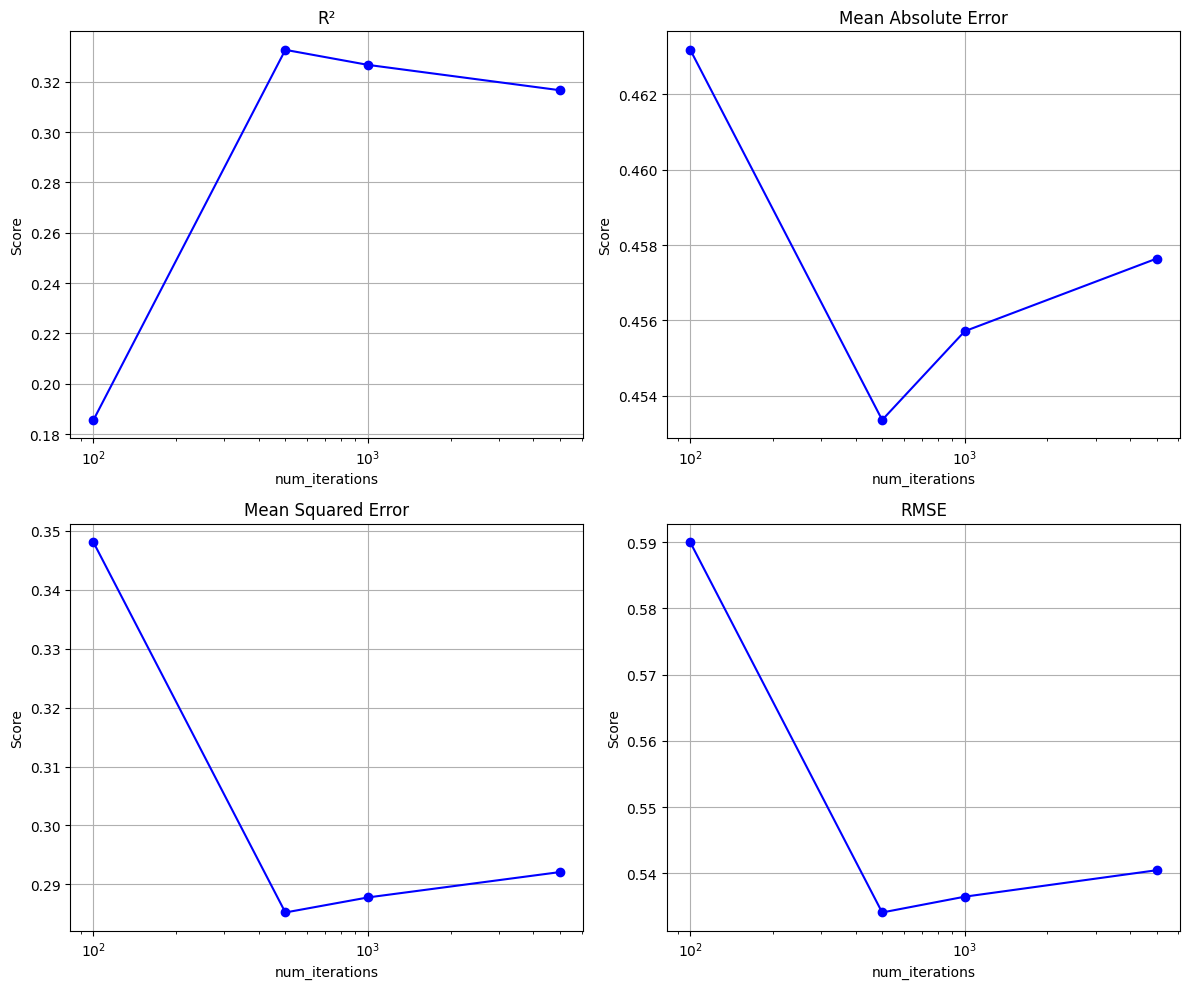

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# 评估指标
r2_scores = []
mean_absolute_errors = []
mean_squared_errors = []
rmses = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 定义不同的学习率
iterations = [100, 500, 1000, 5000]
r2_scores = []
mean_absolute_errors = []
mean_squared_errors = []
rmses = []

# 遍历不同的学习率
for num_iterations in iterations:
    # 训练模型，设置无偏置项
    model_iter = LinearRegression(include_bias=True, regularization=True)
    model_iter.fit(X_train_scaled, y_train, method='gradient', alpha=0.01, num_iterations=num_iterations)
    y_pred_iter = model_iter.predict(X_test_scaled)

    # 计算评估指标并保存
    r2_iter = r2_score(y_test, y_pred_iter)  # 取绝对值
    mae_iter = mean_absolute_error(y_test, y_pred_iter)
    mse_iter = mean_squared_error(y_test, y_pred_iter)
    rmse_iter = np.sqrt(mse_iter)

    r2_scores.append(r2_iter)
    mean_absolute_errors.append(mae_iter)
    mean_squared_errors.append(mse_iter)
    rmses.append(rmse_iter)

# 定义评估指标及对应的标题和颜色
metrics = [r2_scores, mean_absolute_errors, mean_squared_errors, rmses]
metric_titles = ['R²', 'Mean Absolute Error', 'Mean Squared Error', 'RMSE']
colors = 'blue'

# 创建四个子图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 绘制每个指标的条形图
for i, (metric, title) in enumerate(zip(metrics, metric_titles)):
    ax = axs[i // 2, i % 2]
    ax.plot(iterations, metric, marker='o', color=colors)  # 使用折线图
    ax.set_title(title)
    ax.set_xlabel('num_iterations')
    ax.set_ylabel('Score')
    ax.set_xscale('log')  # 采用对数坐标
    ax.grid(True)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


## 实验4：不同的正则化值

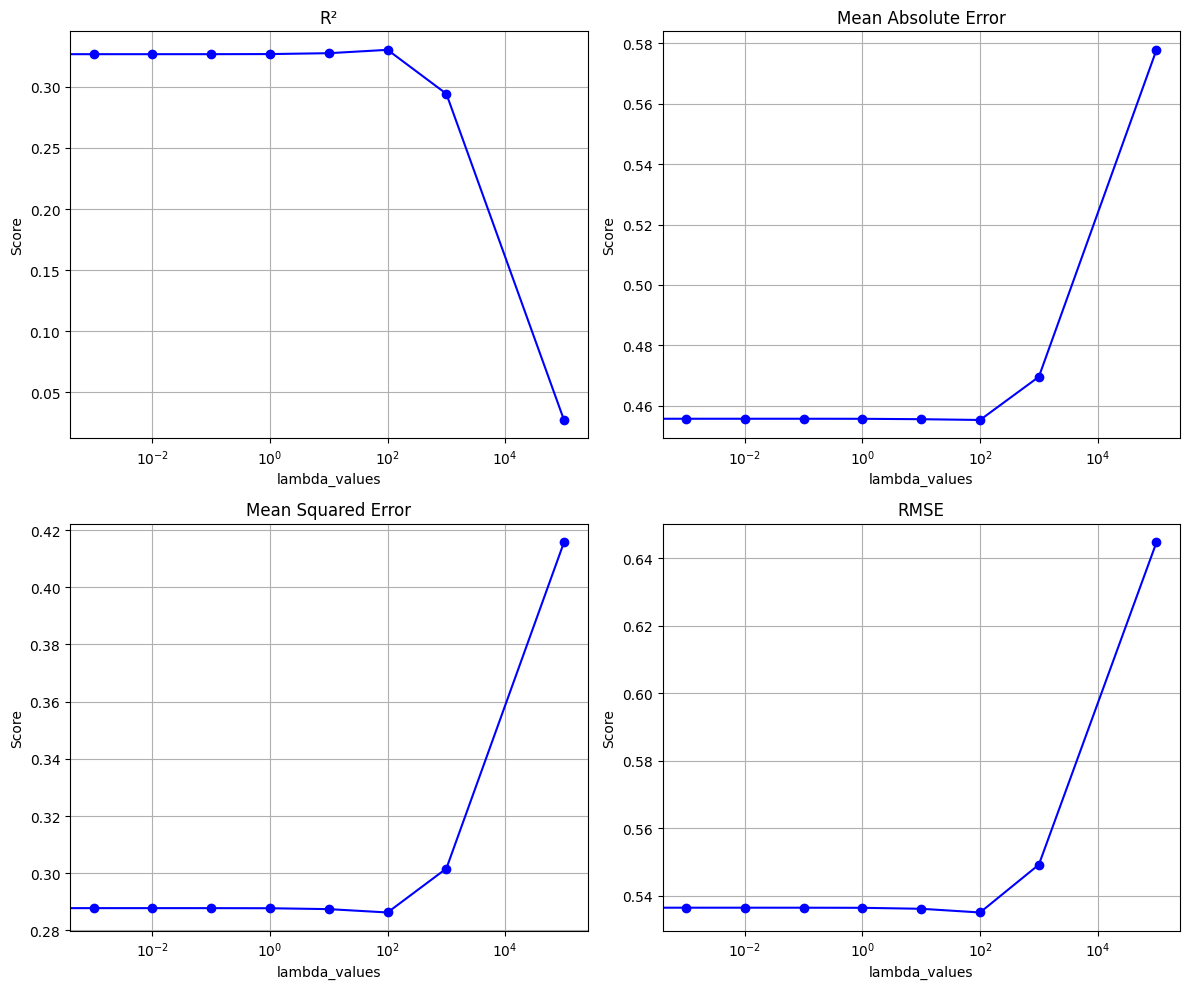

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# 评估指标
r2_scores = []
mean_absolute_errors = []
mean_squared_errors = []
rmses = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lambda_values = [0,0.001, 0.01, 0.1, 1.0, 10.0, 100.0,1000,100000]
r2_scores = []
mean_absolute_errors = []
mean_squared_errors = []
rmses = []

# 遍历不同的学习率
for lambda_ in lambda_values:
    # 训练模型，设置无偏置项
    model_lamb = LinearRegression(include_bias=True, regularization=True)
    model_lamb.fit(X_train_scaled, y_train, method='gradient', alpha=0.01, num_iterations=1000,lambda_=lambda_)
    y_pred_lamb = model_lamb.predict(X_test_scaled)

    # 计算评估指标并保存
    r2_lamb = r2_score(y_test, y_pred_lamb)  # 取绝对值
    mae_lamb = mean_absolute_error(y_test, y_pred_lamb)
    mse_lamb = mean_squared_error(y_test, y_pred_lamb)
    rmse_lamb = np.sqrt(mse_lamb)

    r2_scores.append(r2_lamb)
    mean_absolute_errors.append(mae_lamb)
    mean_squared_errors.append(mse_lamb)
    rmses.append(rmse_lamb)

# 定义评估指标及对应的标题和颜色
metrics = [r2_scores, mean_absolute_errors, mean_squared_errors, rmses]
metric_titles = ['R²', 'Mean Absolute Error', 'Mean Squared Error', 'RMSE']
colors = 'blue'

# 创建四个子图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 绘制每个指标的条形图
for i, (metric, title) in enumerate(zip(metrics, metric_titles)):
    ax = axs[i // 2, i % 2]
    ax.plot(lambda_values, metric, marker='o', color=colors)  # 使用折线图
    ax.set_title(title)
    ax.set_xlabel('lambda_values')
    ax.set_ylabel('Score')
    ax.set_xscale('log')  # 采用对数坐标
    ax.grid(True)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()
